# Subsetting and Descriptive Stats

## Before your start:
   - Remember that you just need to do one of the challenges.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in IronHack's database.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly: enjoy the process!
   
#### Import all the necessary libraries here:

In [126]:
# import libraries here
import pandas as pd
import numpy as np

# [ONLY ONE MANDATORY] Challenge 1
#### In this challenge we will use the `Temp_States`  dataset. 

#### First import it into a dataframe called `temp`.

In [76]:
# your code here
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`.

In [77]:
# your code here
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the *temp* dataframe. What types of data do we have? Comment your result.

In [78]:
# your code here
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

In [79]:
"""
your comments here
Two object types, that means 2 categorical variables and 1 numerical variable
"""

'\nyour comments here\nTwo object types, that means 2 categorical variables and 1 numerical variable\n'

#### Select the rows where state is New York.

In [80]:
# your code here
temp[temp['State']=='New York']

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average temperature of cities in New York?

In [81]:
# your code here
temp[temp['State']=='New York'].mean()

Temperature    10.740741
dtype: float64

#### Which states and cities have a temperature above 15 degrees Celsius?

In [82]:
# your code here
temp15 = temp.loc[(temp.Temperature > 15)]
#display(temp15.iloc[:,0 : 2])
temp15_city = (temp15.iloc[:,0]).tolist()
temp15_state = (temp15.iloc[:,1]).tolist()
list(zip(temp15_city,temp15_state))

[('NYC', 'New York'),
 ('Hartford', 'Connecticut'),
 ('Treton', 'New Jersey'),
 ('Newark', 'New Jersey')]

#### Now, return only the cities that have a temperature above 15 degrees Celsius.

In [83]:
# your code here
temp15_city

['NYC', 'Hartford', 'Treton', 'Newark']

#### Which cities have a temperature above 15 degrees Celcius and below 20 degrees Celsius?

**Hint**: First, write the condition. Then, select the rows.

In [84]:
temp15_20 = temp.loc[(temp.Temperature > 15) & (temp.Temperature < 20)]
#display(temp15.iloc[:,0 : 2])
temp15_20_city = (temp15_20.iloc[:,0]).tolist()
temp15_20_city

['NYC', 'Hartford']

#### Find the mean and standard deviation of the temperature of each state.

In [85]:
# your code here
temp.groupby('State').agg({'Temperature':['mean','std']})

Temperature          
                   mean       std
State                            
Connecticut   15.833333  1.964186
New Jersey    21.111111  1.571348
New York      10.740741  8.133404

# [ONLY ONE MANDATORY]  Challenge 2

#### Load the `employees` dataset into a dataframe. Call the dataframe `employees`.

In [86]:
# your code here
employees = pd.read_csv('Employee.csv')

#### Explore the data types of the `employees` dataframe. Comment your results.

In [87]:
# your code here
employees.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

In [88]:
"""
your comments here
"""

'\nyour comments here\n'

#### What's the average salary in this company?

In [89]:
# your code here
employees['Salary'].mean()

48.888888888888886

#### What's the highest salary?

In [90]:
# your code here
employees['Salary'].max()

70

#### What's the lowest salary?

In [91]:
# your code here
employees['Salary'].min()

30

#### Who are the employees with the lowest salary?

In [92]:
# your code here
employees.loc[employees['Salary'] == employees['Salary'].min(),['Name']]

,Name
1,Maria
2,David


#### Find all the information about an employee called David.

In [93]:
# your code here
employees.loc[employees['Name'] == 'David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you return only David's salary?

In [94]:
# your code here
employees.loc[employees['Name'] == 'David',['Salary']]

,Salary
2,30


#### Print all the rows where job title is associate.

In [95]:
# your code here
employees.loc[employees['Title'] == 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe.
**Tip**: There are 2 ways to do it. Do it both ways.

In [96]:
# Method 1
# your code here
employees.loc[0:2]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [97]:
# Method 2
# your code here
employees.iloc[0:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees whose title is associate and whose salary is above 55.

In [98]:
# your code here
employees.loc[(employees['Title'] == 'associate') & (employees['Salary']>55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees by number of years of employment. What are the average salaries in each group?

In [99]:
employees.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


In [127]:
# your code here
employees.groupby('Years').agg({'Salary':'mean'})

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average salary per title?

In [128]:
# your code here
employees.groupby('Title').agg({'Salary':'mean'})

,Salary
Title,
VP,70.000000
analyst,32.500000
associate,56.666667


####  Find the salary quartiles.


In [102]:
# your code here
employees['Salary'].describe()

count     9.000000
mean     48.888889
std      16.541194
min      30.000000
25%      35.000000
50%      55.000000
75%      60.000000
max      70.000000
Name: Salary, dtype: float64

In [103]:
q1 = employees['Salary'].quantile(0.25)
q2 = employees['Salary'].quantile(0.5)
q3 = employees['Salary'].quantile(0.75)
print(q1,q2,q3)

35.0 55.0 60.0


#### Is the mean salary different per gender?

In [104]:
"""The standart deviation is a quantity expressing by how much the members of a group differ from the mean value for the group."""
#mean_all = employees['Salary'].mean()
#print('the average salary is', mean_all)
#employees.groupby('Gender').agg({'Salary':['mean','std','var']})

employees.groupby('Gender').agg({'Salary':'std'}) # the std is very similar, so we can suppose that are no difference in salary by gender

,Salary
Gender,
F,18.484228
M,16.955825


#### Find the minimum, mean and maximum of all numeric columns for each company department.



In [105]:
# your code here
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_employees = employees.select_dtypes(include=numerics)
numeric_employees.describe()

,Years,Salary
count,9.000000,9.000000
mean,4.111111,48.888889
std,2.803767,16.541194
min,1.000000,30.000000
25%,2.000000,35.000000
50%,3.000000,55.000000
75%,7.000000,60.000000
max,8.000000,70.000000


#### Bonus Question:  for each department, compute the difference between the maximum and the minimum salary.
**Hint**: try using `agg` or `apply` combined with `lambda` functions.

# [ONLY ONE MANDATORY] Challenge 3
#### Open the `Orders` dataset. Name your dataset `orders`.

In [140]:
# your code here
orders = pd.read_csv('Orders.zip', compression='zip')
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Explore your dataset by looking at the data types and summary statistics. Comment your results.

In [115]:
# your code here
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [130]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


In [ ]:
"""
your comments here
"""

####  What is the average purchase price?

In [131]:
# your code here
orders['UnitPrice'].mean()

3.116174480549152

#### What are the highest and lowest purchase prices? 

In [122]:
# your code here
highest = orders['UnitPrice'].max()
lowest = orders['UnitPrice'].min()
print('highest',highest,'\nlowest',lowest)

highest 8142.75 
lowest 0.0


#### Select all the customers from Spain.
**Hint**: Remember that you are not asked to find orders from Spain but customers. A customer might have more than one order associated. 

In [123]:
# your code here
orders.columns

Index(['Unnamed: 0', 'InvoiceNo', 'StockCode', 'year', 'month', 'day', 'hour',
       'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID',
       'Country', 'amount_spent'],
      dtype='object')

#### How many customers do we have in Spain?

In [161]:
# your code here
#orders[orders['Country']=='Spain'].agg({'CustomerID':'count'})
orders.groupby(['Country']).agg({'CustomerID':'count'}).loc['Spain'] #another way to do it

CustomerID    2485
dtype: int64

#### Select all the customers who have bought more than 50 items.
**Hint**: Remember that you are not asked to find orders with more than 50 items but customers who bought more than 50 items. A customer with two orders of 30 items each should appear in the selection.

In [187]:
# your code here
orders_50 = orders.groupby('CustomerID').agg({'Quantity':'sum'})
orders_50[orders_50['Quantity']>50]
#orders_50[orders_50['Quantity']>50].reset_index().iloc[:,0].tolist() #list is too long

,Quantity
CustomerID,
12346,74215
12347,2458
12348,2341
12349,631
12350,197
...,...
18278,66
18281,54
18282,103


#### Select orders from Spain that include more than 50 items.

In [191]:
# your code here
orders_50_Spain = orders.groupby(['Country','CustomerID']).agg({'Quantity':'sum'})
orders_50_Spain[(orders_50_Spain['Quantity']>50)].loc['Spain']

,Quantity
CustomerID,
12354,530
12417,267
12421,484
12442,182
12445,62
12448,243
12450,128
12454,1006
12455,566


#### Select all free orders.

In [193]:
# your code here
orders[orders['amount_spent']==0.0]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
34494,56674,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
53788,86789,543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0
85671,130188,547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0
92875,139453,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0
97430,145208,548871,22162,2011,4,1,14,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410,United Kingdom,0.0


#### Select all orders whose description starts with `lunch bag`.
**Hint**: use string functions.

In [203]:
orders_lunch_bag = orders[orders['Description'].str.contains("lunch bag")]
orders_lunch_bag.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30


#### Select all `lunch bag` orders made in 2011.

In [204]:
# your code here
orders_lunch_bag[orders_lunch_bag['year'] == 2011]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Show the frequency distribution of the amount spent in Spain.

In [272]:
# your code here
import matplotlib as plt
import seaborn as sns
orders_Spain = orders.groupby(['Country','amount_spent']).agg({'CustomerID':'count'})
Spain = orders_Spain.loc['Spain'].reset_index()
#Spain

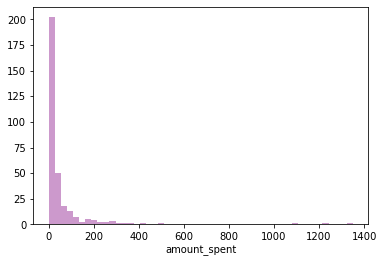

In [232]:
ax = sns.distplot(Spain['amount_spent'],color='purple',kde=False) #kde = False remove the line

#### Select all orders made in the month of August.

In [266]:
# your code here
August = orders[orders['month']==8]
August.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20


#### Find the number of orders made by each country in the month of August.
**Hint**: Use value_counts().

In [268]:
August.groupby('Country').agg({'InvoiceNo':'count'})

,InvoiceNo
Country,
Australia,107
Austria,88
Belgium,194
Canada,5
Channel Islands,140
Denmark,16
EIRE,593
Finland,61
France,569


#### What's the  average amount of money spent by country?

In [271]:
# your code here
August.groupby('Country').agg({'amount_spent':'mean'}) #only August
orders.groupby('Country').agg({'amount_spent':'mean'}) #all months

,amount_spent
Country,
Australia,116.895620
Austria,25.624824
Bahrain,32.258824
Belgium,20.283772
Brazil,35.737500
Canada,24.280662
Channel Islands,27.340160
Cyprus,22.134169
Czech Republic,33.069600


#### What's the most expensive item?

In [287]:
# your code here
pos =orders['UnitPrice'].max()
orders[orders['UnitPrice']==pos]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
118352,173382,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### What is the average amount spent per year?

In [274]:
# your code here
orders.groupby('year').agg({'amount_spent':'mean'})

,amount_spent
year,
2010,21.892733
2011,22.430074
